In [8]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("Pandas version: {}".format(pd.__version__))

import matplotlib
print("Matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))


import random
import time

print('-' * 25)
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


Python version: 3.11.13 (main, Jul  8 2025, 20:59:57) [Clang 20.1.4 ]
Pandas version: 2.3.2
Matplotlib version: 3.10.6
NumPy version: 2.3.2
SciPy version: 1.16.1
IPython version: 9.4.0
scikit-learn version: 1.7.1
-------------------------
gender_submission.csv
test.csv
train.csv



In [9]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes,ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [12]:
data_raw = pd.read_csv('input/train.csv')
data_val = pd.read_csv('input/test.csv')

data1 = data_raw.copy(deep=True)

print(data_raw.info())

data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S


<Axes: >

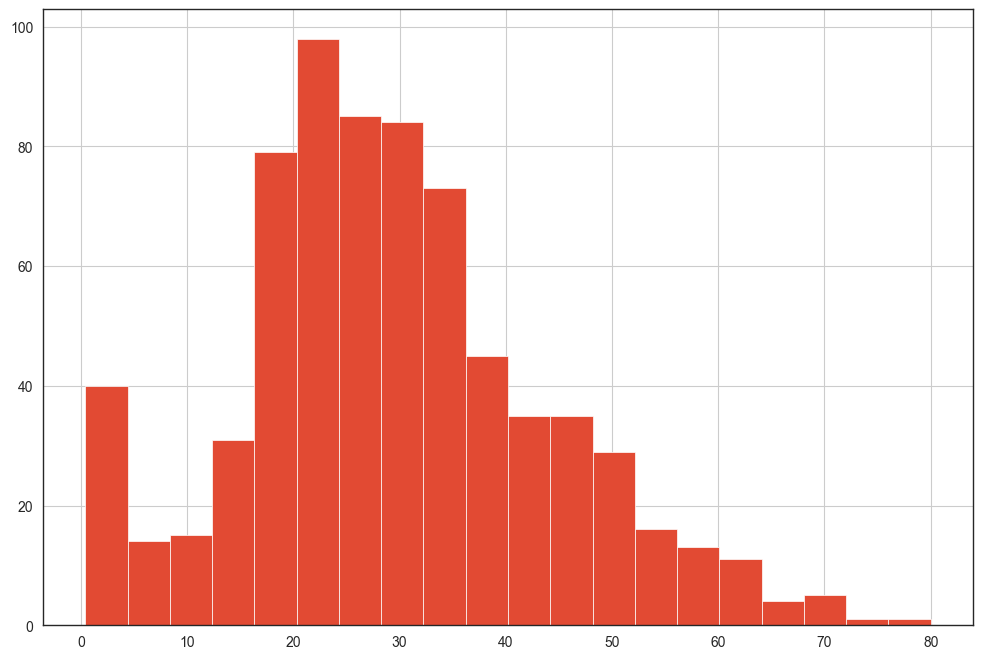

In [13]:
data_raw.Age.hist(bins=20)

In [15]:
print("Train columns with null values:\n", data1.isnull().sum())

print('-' * 10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print('-' * 10)

data_raw.describe(include='all')


Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [23]:
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    dataset["Age"]  = dataset["Age"].fillna(dataset["Age"].median())
    dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
    dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

# drop_column = ["PassengerId", "Cabin", "Ticket"]
# data1.drop(drop_column, axis=1, inplace=True)

# print(data1.isnull().sum())
# print("-" * 10)
# print(data_val.isnull().sum())

In [24]:
print(data1.isnull().sum())
print("-" * 10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [32]:
data1.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [36]:
pd.cut(data1['Age'], 4).value_counts()

Age
(20.315, 40.21]    562
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: count, dtype: int64

In [39]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0 # now update to no/0 if family size is greater than 1

    dataset['Title'] = dataset.Name.str.split(', ', expand = True)[1].str.split('.', expand = True)[0]  
    
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)



In [44]:
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-' * 10)

data1.info()
data_val.info()
data1.sample(10)

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFram

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
487,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.7000,C,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"
643,1,3,"Foo, Mr. Choong",male,28.0,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
353,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,17.8000,S,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
146,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,7.7958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]"
797,1,3,"Osman, Mrs. Mara",female,31.0,0,0,8.6833,S,1,1,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
719,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,7.7750,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
224,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,90.0000,S,2,0,Mr,"(31.0, 512.329]","(32.0, 48.0]"
795,0,2,"Otter, Mr. Richard",male,39.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
677,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,9.8417,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
